# Breast Cancer Classification
## Data 201 Final Project
## Yizhuo Jia, Kaiyao Li, Ruiwei Wan
## December 16, 2022

## Goal: 
### Our project is trying to apply supervised machine learning classification to identify the condition of breast tumor, that is, whether the stage of the breast tumor is malignant(1) or benign(0) depending on different physical features of tumor. By the end, we are aiming to find a model with the best prediction on the stage of breast tumor, and the most important features for this classification.

## Data Source: Kaggle
- URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## I. Data preprocessing

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.mlab as mlab
import scipy.stats as st

In [2]:
#Importing Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn import metrics
from sklearn.feature_selection import RFECV

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading dataset

df = pd.read_csv('Breast_Cancer_classification.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
# First to see whether there is null in the dataset
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# Drop column with null
# Drop id column
df=df.drop(['id','Unnamed: 32'],axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Introduction of data variables
### - Dependent Variable:
- diagnosis: The diagnosis of the stage of breast tumor, 'M' or 1 for malignant, 'B' or 0 for benign

### - Independent Variables:
#### Since each tumor is not a perfect sphere, every characteristic of the tumor changes as we observe from different dimensions.
#### Overall, we observed that the variables in the data are divided into three large categories: 
- _mean: the mean value of variables
- _se: the standard error value of the variables
- _worst: the worst value of the variables

#### Each category above includes the following ten variables:
#### Variables that describe the size of tumor: 
- Radius: mean of distances from center to points on the perimeter
- Area: area of the tumor
- Perimeter: size of the core tumor

#### Variables that describe the shape of tumor:
- Texture: standard deviation of gray-scale values
- Smoothness: local variation in radius lengths
- Compactness: perimeter^2 / area - 1.0
- Concavity: severity of concave portions of the contou
- Concave Points: number of concave portions of the contour

#### Variables that describe self-similarity of tumor:
- Symmetry: symmetry of the tumor
- Fractal Dimensions: "coastline approximation" - 1

#### In total, there are 569 tumor samples provided in the data.

In [7]:
# Change diagnosis into binary
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

0    357
1    212
Name: diagnosis, dtype: int64

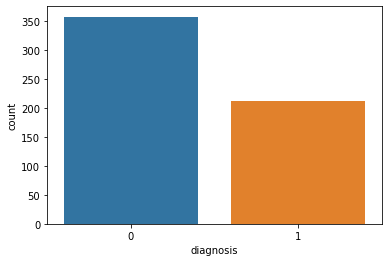

In [8]:
#Exploring target variable
sns.countplot(x='diagnosis', data=df)

df.diagnosis.value_counts()

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
# Run Logistic Regression with all variables
X=df[[ 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]
y=df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [11]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sd = sc.transform(X_train)

In [12]:
X_train_sd = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)
X_test_sd = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [13]:
y_pred = logreg.predict(X_test_sd)
accuracy_score(y_test, y_pred)

0.5146198830409356

### The accuracy is not high after running logistic regression on all the variables. The reason might be:
- Correlations between features are high → Correlation Matrix
- Some features do not fit for this classification → Feature Selection

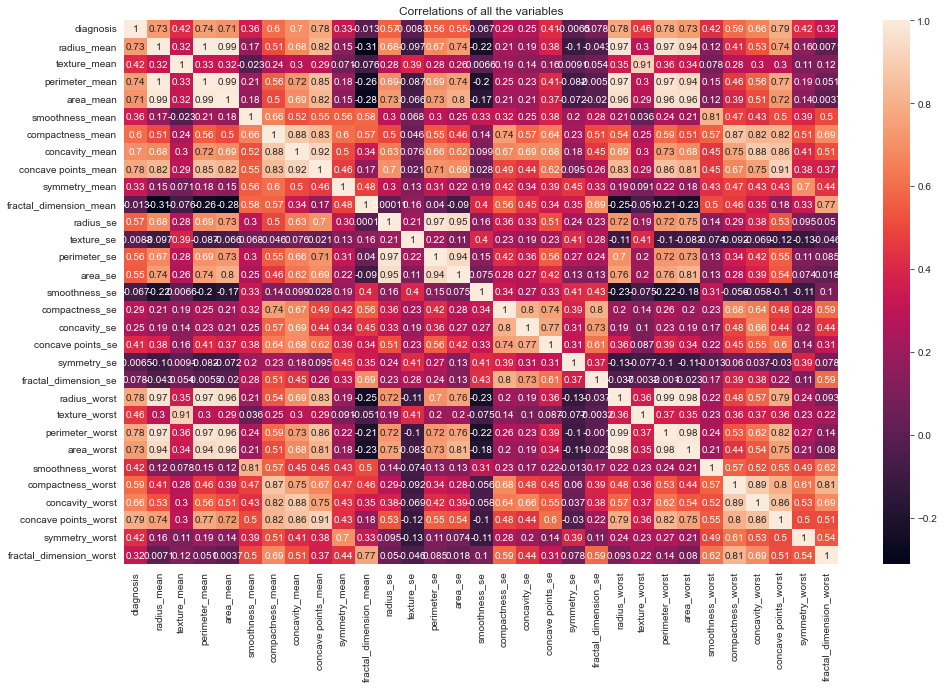

In [108]:
# Plot a correlation matrix to see whether there is correlation between variables
plt.figure(figsize=(16,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlations of all the variables')
plt.show()

### Since 30 features gave us too much information in the correlation matrix, we splited them into 3 categories based on _mean,  _se and _worst.

In [15]:
# Split the data in to 3 categories:
df_m=df.iloc[:,1:11] # Mean Group
df_s=df.iloc[:,11:21] # Se Group
df_w=df.iloc[:,21:31] # Worst Group
df_m.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')

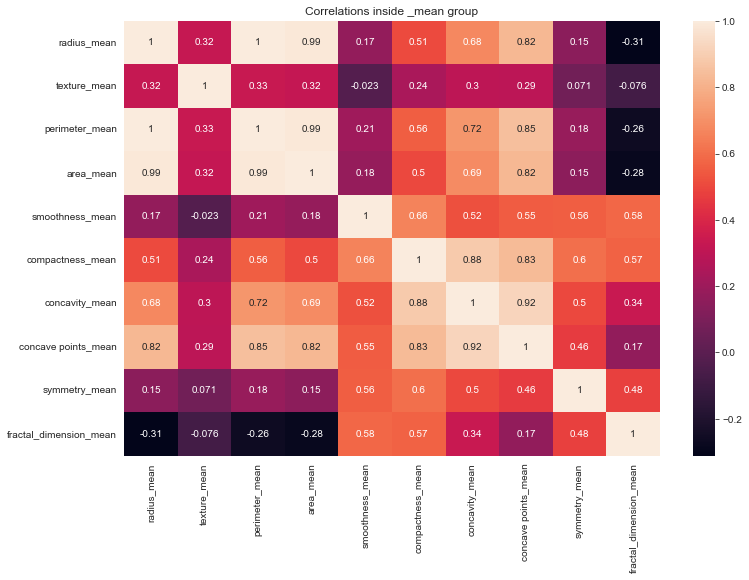

In [105]:
# Plot a correlation matrix in the mean category
plt.figure(figsize=(12,8))
corr_matrix = df_m.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlations inside _mean group')
plt.show()

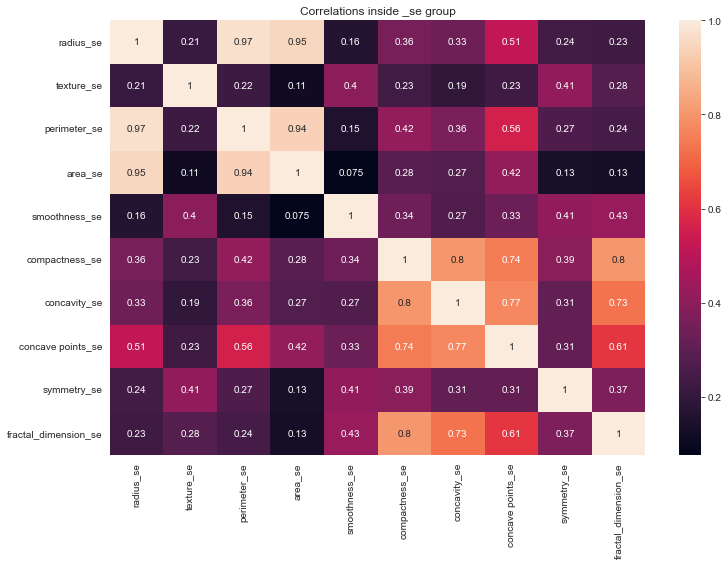

In [106]:
# Plot a correlation matrix in the se category
plt.figure(figsize=(12,8))
corr_matrix = df_s.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlations inside _se group')
plt.show()

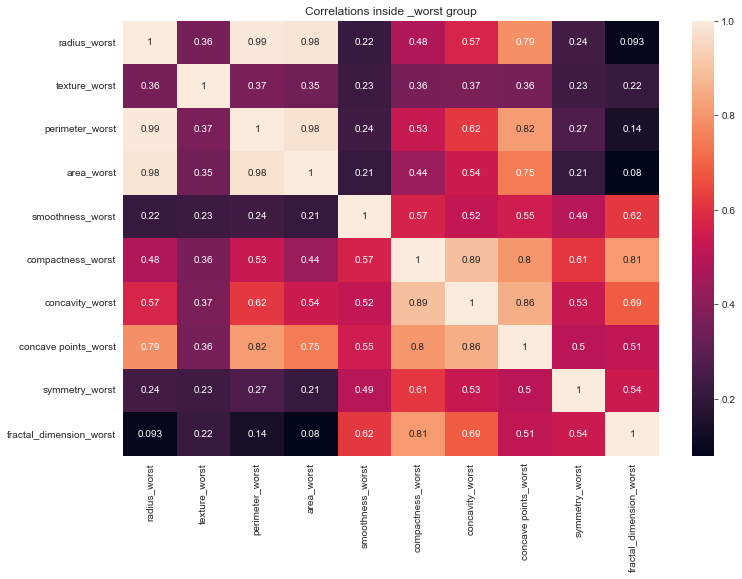

In [109]:
# Plot a correlation matrix in the worst category
plt.figure(figsize=(12,8))
corr_matrix = df_w.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlations inside _worst group')
plt.show()

#### According to the correlation matrix, there are two groups of variables that are highly correlated within each category:
- radius, perimeter, area
- compactness, concavity, concave points

#### Thus, according to the definition of each variable, we decide to randomly keep one variable for each group to avoid high correlations between similar variables:
- perimeter
- compactness

## Feature Selection
### For convenience, we first select optimal variables by logistic regression in each category.

### _mean Group

In [19]:
# Fit Logistic Regression
X=df_m[['texture_mean', 'perimeter_mean',
       'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']]
y=df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg_fit=logreg.fit(X_train, y_train)

In [20]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sd = sc.transform(X_train)

In [21]:
X_train_sd = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)
X_test_sd = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [22]:
y_pred = logreg.predict(X_test_sd)
accuracy_score(y_test, y_pred)

0.631578947368421

In [23]:
# To see the p-values of each variables:
# logistic regression model
import statsmodels.api as sm 
# get independent variables
X=df_m[['texture_mean', 'perimeter_mean',
       'smoothness_mean', 'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean']]
# get response variables
y=df[['diagnosis']]
# fit the model with maximum likelihood function
model = sm.Logit(endog=y, exog=X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.189697
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.7127
Time:                        17:10:28   Log-Likelihood:                -107.94
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.675e-113
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
texture_mean               0.2569      0.047      5.470      0.000       0.165      

#### RFECV result:

In [24]:
selector = RFECV(logreg, step=1, cv=5)
selector.fit(X_train_sd, y_train)
features = X_train_sd.columns[selector.support_]
print('There are',selector.n_features_,'features selected:\n',features)

There are 5 features selected:
 Index(['texture_mean', 'perimeter_mean', 'smoothness_mean', 'compactness_mean',
       'fractal_dimension_mean'],
      dtype='object')


### _se Group

In [110]:
# Fit Logistic Regression
X=df_s[['texture_se', 'perimeter_se',
       'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']]
y=df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg_fit=logreg.fit(X_train, y_train)

In [26]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sd = sc.transform(X_train)

In [27]:
X_train_sd = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)
X_test_sd = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [28]:
y_pred = logreg.predict(X_test_sd)
accuracy_score(y_test, y_pred)

0.6666666666666666

In [29]:
# To see the p-values of each variables:
# logistic regression model
import statsmodels.api as sm 
# get independent variables
X=df_s[['texture_se', 'perimeter_se',
       'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']]
# get response variables
y=df[['diagnosis']]
# fit the model with maximum likelihood function
model = sm.Logit(endog=y, exog=X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.366732
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.4446
Time:                        17:10:28   Log-Likelihood:                -208.67
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                 4.632e-70
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
texture_se              -1.1702      0.332     -3.521      0.000      -1.821      -0.519

#### RFECV result:

In [30]:
selector = RFECV(logreg, step=1, cv=5)
selector.fit(X_train_sd, y_train)
features = X_train_sd.columns[selector.support_]
print('There are',selector.n_features_,'features selected:\n',features)

There are 6 features selected:
 Index(['texture_se', 'perimeter_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')


### _worst Group

In [31]:
# Fit Logistic Regression
X=df_w[['texture_worst', 'perimeter_worst',
       'smoothness_worst', 'compactness_worst', 'symmetry_worst', 'fractal_dimension_worst']]
y=df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg_fit=logreg.fit(X_train, y_train)

In [32]:
# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sd = sc.transform(X_train)

In [33]:
X_train_sd = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)
X_test_sd = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [34]:
y_pred = logreg.predict(X_test_sd)
accuracy_score(y_test, y_pred)

0.631578947368421

In [35]:
# To see the p-values of each variables:
import statsmodels.api as sm 
# fit the model with maximum likelihood function
model = sm.Logit(endog=y, exog=X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.263781
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.6005
Time:                        17:10:29   Log-Likelihood:                -150.09
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                 2.631e-95
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
texture_worst               0.0486      0.027      1.829      0.067      -0.003   

#### RFECV result:

In [36]:
selector = RFECV(logreg, step=1, cv=5)
selector.fit(X_train_sd, y_train)
features = X_train_sd.columns[selector.support_]
print('There are',selector.n_features_,'features selected:\n',features)

There are 5 features selected:
 Index(['texture_worst', 'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst'],
      dtype='object')


## PCA 
### We want to see how the the independent varibales 'diagnosis' are distributed, so we make a PCA plot of the _mean Group.

In [37]:
df_pca_m=df_m.copy()
df_pca_m=df_pca_m.drop(['symmetry_mean','radius_mean','area_mean', 'concavity_mean','concave points_mean'],axis=1)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaler.fit(df_pca_m)

StandardScaler()

In [39]:
scaled_data = scaler.transform(df_pca_m)
pca = PCA(n_components = 2)
pca.fit(scaled_data)
components = pca.transform(scaled_data)
components.shape

(569, 2)

In [40]:
data_diag = pd.read_csv('Breast_Cancer_classification.csv')[['diagnosis']]
pca_values_df = pd.DataFrame(data = components, columns = ['Principal Component 1', 'Principal Component 2'])
pca_values_df.insert(0, "Diagnosis", data_diag["diagnosis"].values, True)
pca_values_df

,Diagnosis,Principal Component 1,Principal Component 2
0,M,3.973365,1.413988
1,M,-0.693594,-1.434370
2,M,1.535290,-1.361182
3,M,5.967199,3.032605
4,M,0.597938,-0.794675
...,...,...,...
564,M,1.023997,-1.974989
565,M,0.374077,-2.655329
566,M,-0.375677,-2.144947
567,M,4.283751,-2.024142


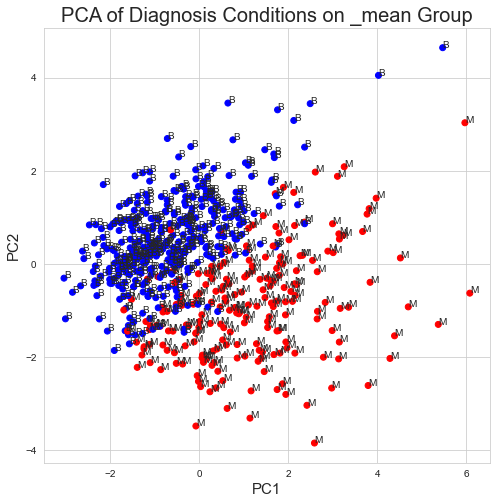

In [112]:
# Label to color 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA of Diagnosis Conditions on _mean Group', fontsize = 20)

X_clustered= pca_values_df['Diagnosis']
LABEL_COLOR_MAP = {'M' : 'r',
                   'B' : 'b'}

label_color = [LABEL_COLOR_MAP[i] for i in X_clustered]

plt.scatter(pca_values_df['Principal Component 1'], pca_values_df['Principal Component 2'],c= label_color)
n = pca_values_df['Diagnosis'].values.copy()
x = pca_values_df['Principal Component 1'].values.copy()
y = pca_values_df['Principal Component 2'].values.copy()


for i, txt in enumerate(n):
    plt.annotate(txt, (x[i], y[i]))  
ax.grid()
plt.grid(True) 

## Put 3 Groups Together
### After doing the feature selections in each group, we put the selected variables together and do RFECV again.

In [45]:
df_pca_w=df_w.copy()
df_pca_w=df_pca_w.drop(['fractal_dimension_worst','radius_worst','area_worst', 'concavity_worst','concave points_worst'],axis=1)
df_pca_s=df_s.copy()
df_pca_s=df_pca_s.drop(['radius_se','area_se', 'concavity_se','concave points_se'],axis=1)

In [46]:
# Merge 3 groups
df_all=pd.concat([df_pca_w,pd.concat([df_pca_m,df_pca_s],axis=1)],axis=1)
df_all

,texture_worst,perimeter_worst,smoothness_worst,compactness_worst,symmetry_worst,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,fractal_dimension_mean,texture_se,perimeter_se,smoothness_se,compactness_se,symmetry_se,fractal_dimension_se
0,17.33,184.60,0.16220,0.66560,0.4601,10.38,122.80,0.11840,0.27760,0.07871,0.9053,8.589,0.006399,0.04904,0.03003,0.006193
1,23.41,158.80,0.12380,0.18660,0.2750,17.77,132.90,0.08474,0.07864,0.05667,0.7339,3.398,0.005225,0.01308,0.01389,0.003532
2,25.53,152.50,0.14440,0.42450,0.3613,21.25,130.00,0.10960,0.15990,0.05999,0.7869,4.585,0.006150,0.04006,0.02250,0.004571
3,26.50,98.87,0.20980,0.86630,0.6638,20.38,77.58,0.14250,0.28390,0.09744,1.1560,3.445,0.009110,0.07458,0.05963,0.009208
4,16.67,152.20,0.13740,0.20500,0.2364,14.34,135.10,0.10030,0.13280,0.05883,0.7813,5.438,0.011490,0.02461,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,26.40,166.10,0.14100,0.21130,0.2060,22.39,142.00,0.11100,0.11590,0.05623,1.2560,7.673,0.010300,0.02891,0.01114,0.004239
565,38.25,155.00,0.11660,0.19220,0.2572,28.25,131.20,0.09780,0.10340,0.05533,2.4630,5.203,0.005769,0.02423,0.01898,0.002498
566,34.12,126.70,0.11390,0.30940,0.2218,28.08,108.30,0.08455,0.10230,0.05648,1.0750,3.425,0.005903,0.03731,0.01318,0.003892
567,39.42,184.60,0.16500,0.86810,0.4087,29.33,140.10,0.11780,0.27700,0.07016,1.5950,5.772,0.006522,0.06158,0.02324,0.006185


In [47]:
# Fit logistic regression
X= df_all
y=df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg_fit=logreg.fit(X_train, y_train)

# Standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sd = sc.transform(X_train)

X_train_sd = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)
X_test_sd = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [48]:
selector = RFECV(logreg, step=1, cv=5)
selector.fit(X_train_sd, y_train)

RFECV(cv=5, estimator=LogisticRegression())

#### RFECV Result:

In [49]:
features = X_train_sd.columns[selector.support_]
print('There are',selector.n_features_,'features selected:\n',features)

There are 14 features selected:
 Index(['texture_worst', 'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst', 'texture_mean', 'perimeter_mean',
       'smoothness_mean', 'compactness_mean', 'fractal_dimension_mean',
       'perimeter_se', 'smoothness_se', 'compactness_se',
       'fractal_dimension_se'],
      dtype='object')


## Therefore, 14 features are selected:
- texture_worst, perimeter_worst, smoothness_worst, compactness_worst, symmetry_worst, texture_mean, perimeter_mean
- smoothness_mean, compactness_mean, fractal_dimension_mean, perimeter_se, smoothness_se, compactness_se, fractal_dimension_se
### To get deeper into the selected variables, we want to see the p-values of each variable and their correlations.

In [50]:
# To see the p-values of each variables:
import statsmodels.api as sm 
# fit the model with maximum likelihood function
model = sm.Logit(endog=y, exog=X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.086803
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      553
Method:                           MLE   Df Model:                           15
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                  0.8685
Time:                        17:10:32   Log-Likelihood:                -49.391
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                2.251e-129
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
texture_worst              0.5991      0.197      3.040      0.002       0.213     

#### Correlation Matrix

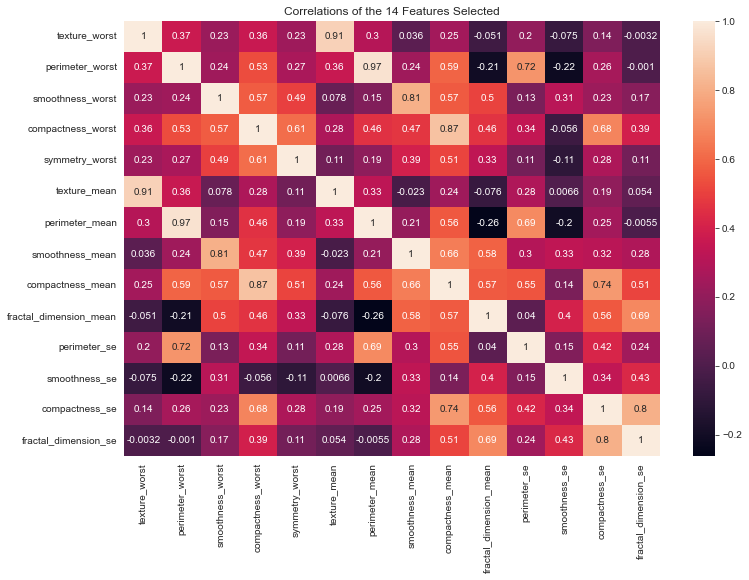

In [114]:
# Selected Data
df_select=df_all[['texture_worst', 'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst', 'texture_mean', 'perimeter_mean',
       'smoothness_mean', 'compactness_mean', 'fractal_dimension_mean',
       'perimeter_se', 'smoothness_se', 'compactness_se',
       'fractal_dimension_se']]
# Plot a correlation matrix for the all selected data
plt.figure(figsize=(12,8))
corr_matrix = df_select.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlations of the 14 Features Selected')
plt.show()

#### We use the scatter matrices and the histograms to see how the 14 features are distributed.

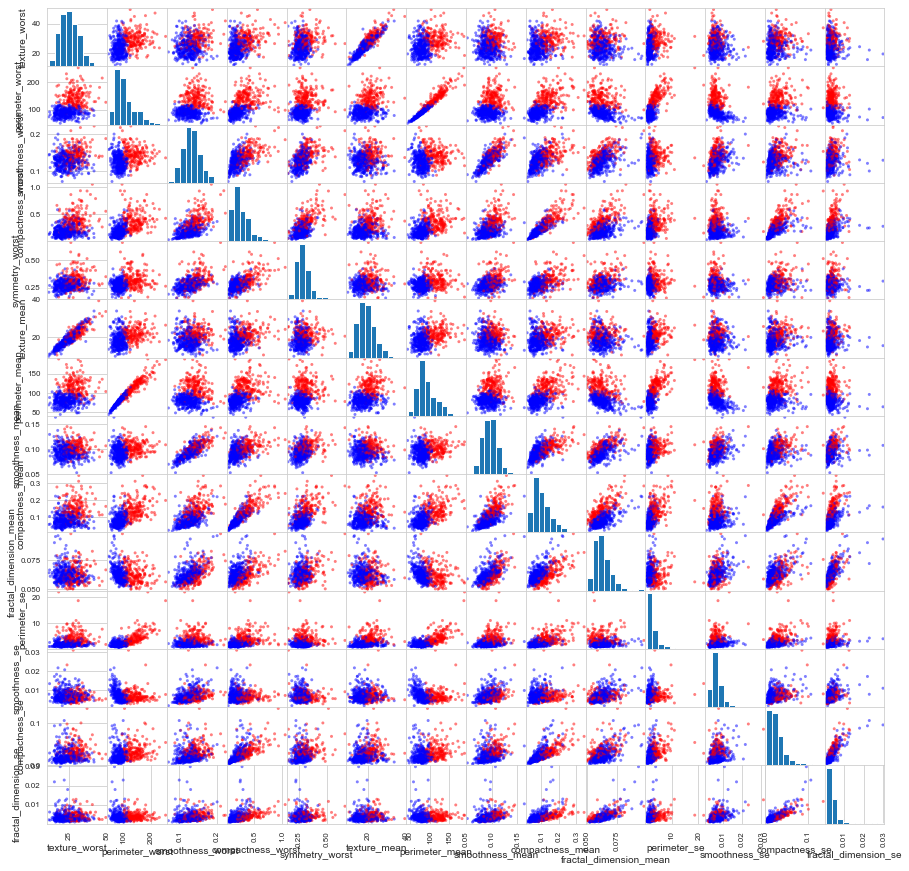

In [115]:
from pandas.plotting import scatter_matrix

color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = df["diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
scatter_matrix(df_select, c=colors, alpha = 0.5, figsize = (15, 15)); # plotting scatter plot matrix

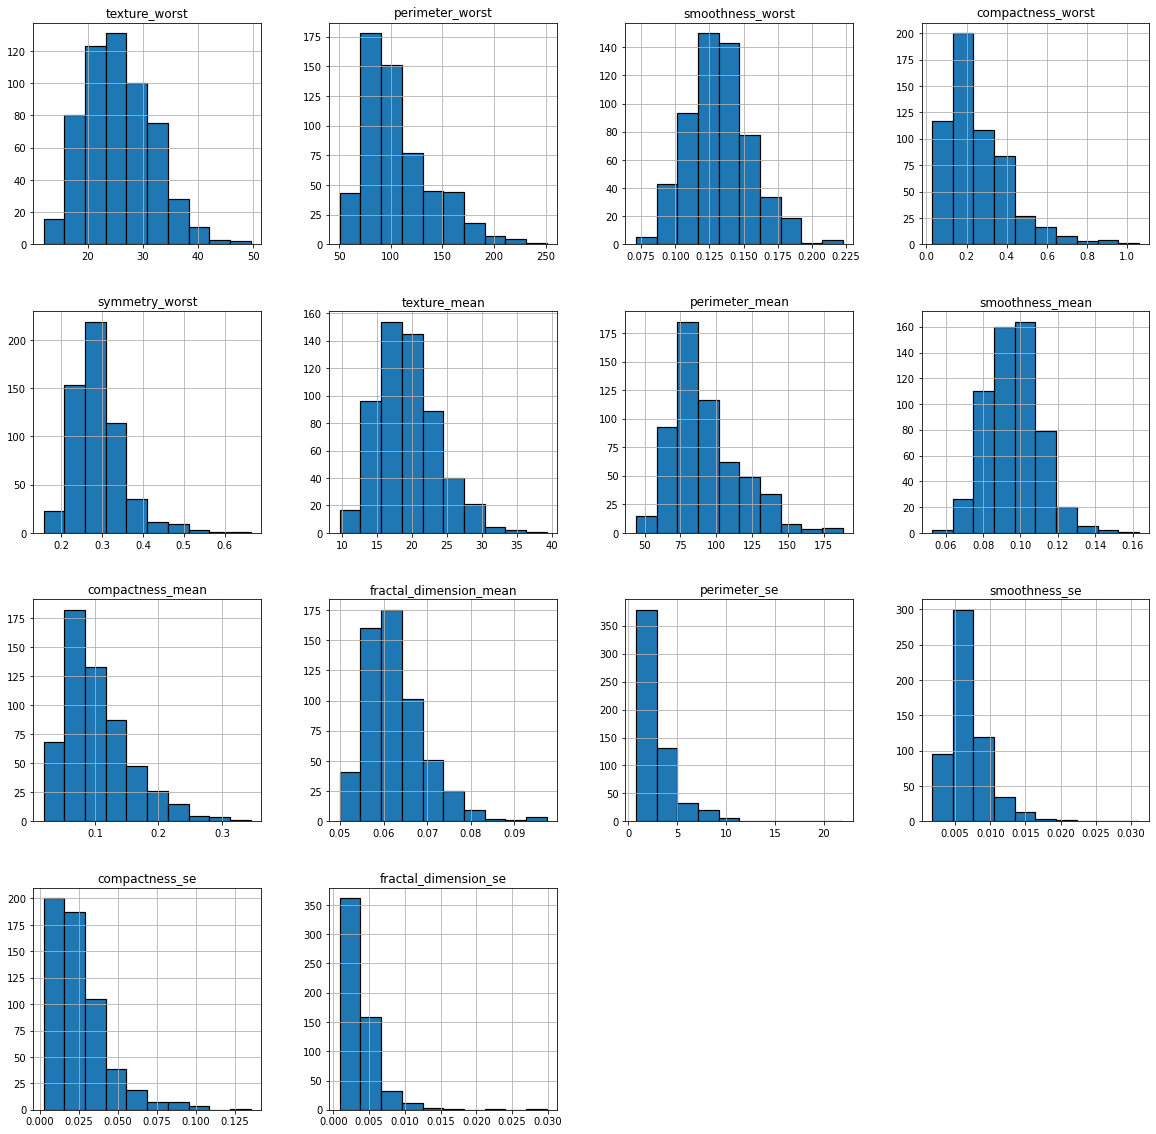

In [53]:
#Histogram to understand the distribution of numerical variables
df_select.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))
plt.show()

### According to the p-values, there are 6 features having p < 0.05.
### We originally removed the variables with p > 0.05 to see how the accuracy change, but it turns out that the accuracies of the models and CV are much lower than the 14 features selected by RFECV.
### Therefore, we decided to keep all the 14 features.

In [54]:
df_6=df_select[['texture_worst', 'symmetry_worst', 'fractal_dimension_mean',
       'perimeter_se', 'compactness_mean', 'compactness_se']]

## CV 
### Evaluate both 14-feature group and 6-feature group to see if it is overfitting.

In [55]:
# CV for 14 variables
from sklearn.model_selection import KFold, train_test_split 
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
X= df_select
y=df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg_fit=logreg.fit(X_train, y_train)

kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
#Kfold.split will show the index for train and test data for each fold

TRAIN: [ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284

In [56]:
#Calculate accuracy (R^2)

logreg = LogisticRegression()
accuracy = []
MSE = []
for k, (train, test) in enumerate(kf.split(X_train)):
    logreg_fit=logreg.fit(X_train, y_train)
    pred = logreg.predict(X_train.iloc[test, :])
    acc = r2_score(y_train.iloc[test], pred)
    mse = mean_squared_error(y_train.iloc[test], pred)
    accuracy.append(acc)
    MSE.append(mse)
    print('Fold: %2d , Accuracy: %.3f, MSE: %.3f' % (k+1, acc, mse))

Fold:  1 , Accuracy: 0.890, MSE: 0.025
Fold:  2 , Accuracy: 0.898, MSE: 0.025
Fold:  3 , Accuracy: 0.713, MSE: 0.050
Fold:  4 , Accuracy: 0.573, MSE: 0.100
Fold:  5 , Accuracy: 0.583, MSE: 0.100
Fold:  6 , Accuracy: 0.688, MSE: 0.075
Fold:  7 , Accuracy: 0.688, MSE: 0.075
Fold:  8 , Accuracy: 0.890, MSE: 0.025
Fold:  9 , Accuracy: 0.897, MSE: 0.026
Fold: 10 , Accuracy: 1.000, MSE: 0.000


In [57]:
print(np.mean(accuracy))
print(np.std(accuracy))

0.7820214726403268
0.1425451239194422


In [58]:
# CV for 6 variables
X= df_6
y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg_fit=logreg.fit(X_train, y_train)

kf = KFold(n_splits=10)
for train_index, test_index in kf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)

#Kfold.split will show the index for train and test data for each fold

TRAIN: [ 40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219
 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237
 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255
 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273
 274 275 276 277 278 279 280 281 282 283 284

In [59]:
#Calculate accuracy (R^2)

logreg = LogisticRegression()
accuracy = []
MSE = []
for k, (train, test) in enumerate(kf.split(X_train)):
    logreg_fit=logreg.fit(X_train, y_train)
    pred = logreg.predict(X_train.iloc[test, :])
    acc = r2_score(y_train.iloc[test], pred)
    mse = mean_squared_error(y_train.iloc[test], pred)
    accuracy.append(acc)
    MSE.append(mse)
    print('Fold: %2d , Accuracy: %.3f, MSE: %.3f' % (k+1, acc, mse))

Fold:  1 , Accuracy: 0.780, MSE: 0.050
Fold:  2 , Accuracy: 0.182, MSE: 0.200
Fold:  3 , Accuracy: -0.004, MSE: 0.175
Fold:  4 , Accuracy: 0.040, MSE: 0.225
Fold:  5 , Accuracy: 0.479, MSE: 0.125
Fold:  6 , Accuracy: 0.375, MSE: 0.150
Fold:  7 , Accuracy: 0.479, MSE: 0.125
Fold:  8 , Accuracy: 0.670, MSE: 0.075
Fold:  9 , Accuracy: 0.692, MSE: 0.077
Fold: 10 , Accuracy: 0.308, MSE: 0.154


In [60]:
print(np.mean(accuracy))
print(np.std(accuracy))

0.4001681803091667
0.2578441181232907


# II. Models
### The accuracies of Logistic Regression in each group are around 60%, which is still not high.
### So, we applied 7 models to find the best model for the breast tumor prediction. 
- Decision Tree & Random Tree
- KNN
- SVM
- Logistic Regression
- Gaussian Naive Bayes
- Adaboost

## Decision Trees & Random Forest

In [42]:
#DT&RF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [61]:
#Creating a function to print evaluation metrics

def print_score(clf, X_train, y_train, X_test, y_test, train=True, pos_label="Yes"):
    if train == False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"accuracy score: {accuracy_score(y_test, pred)}\n")
        print(f"Classification Report: \n \tPrecision: {precision_score(y_test, pred)}\n\tRecall Score: {recall_score(y_test, pred)}\n\tF1 score: {f1_score(y_test, pred)}\n")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [62]:
# Decision Tree for 14 features
X=df_select
y=df[['diagnosis']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.935672514619883

Classification Report: 
 	Precision: 0.8714285714285714
	Recall Score: 0.9682539682539683
	F1 score: 0.9172932330827068

Confusion Matrix: 
 [[99  9]
 [ 2 61]]



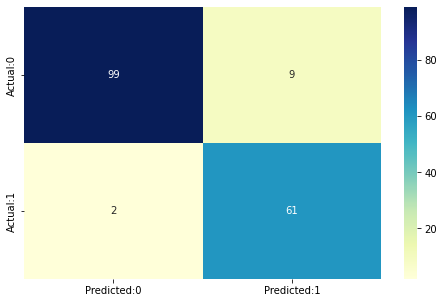

In [63]:
cm=confusion_matrix(y_test,tree_clf.predict(X_test))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [64]:
#True Negative, True Positive, False Negative, False Positive
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
#Accuracy
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round((TP+TN)/float(TP+TN+FP+FN),4))
#Sensitivity
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),4))
# Precision：positive prediction rate
print('Precision = TP/(TP+FP) = ', round(TP/float(TP+FP),4))

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9357
Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9683
Precision = TP/(TP+FP) =  0.8714


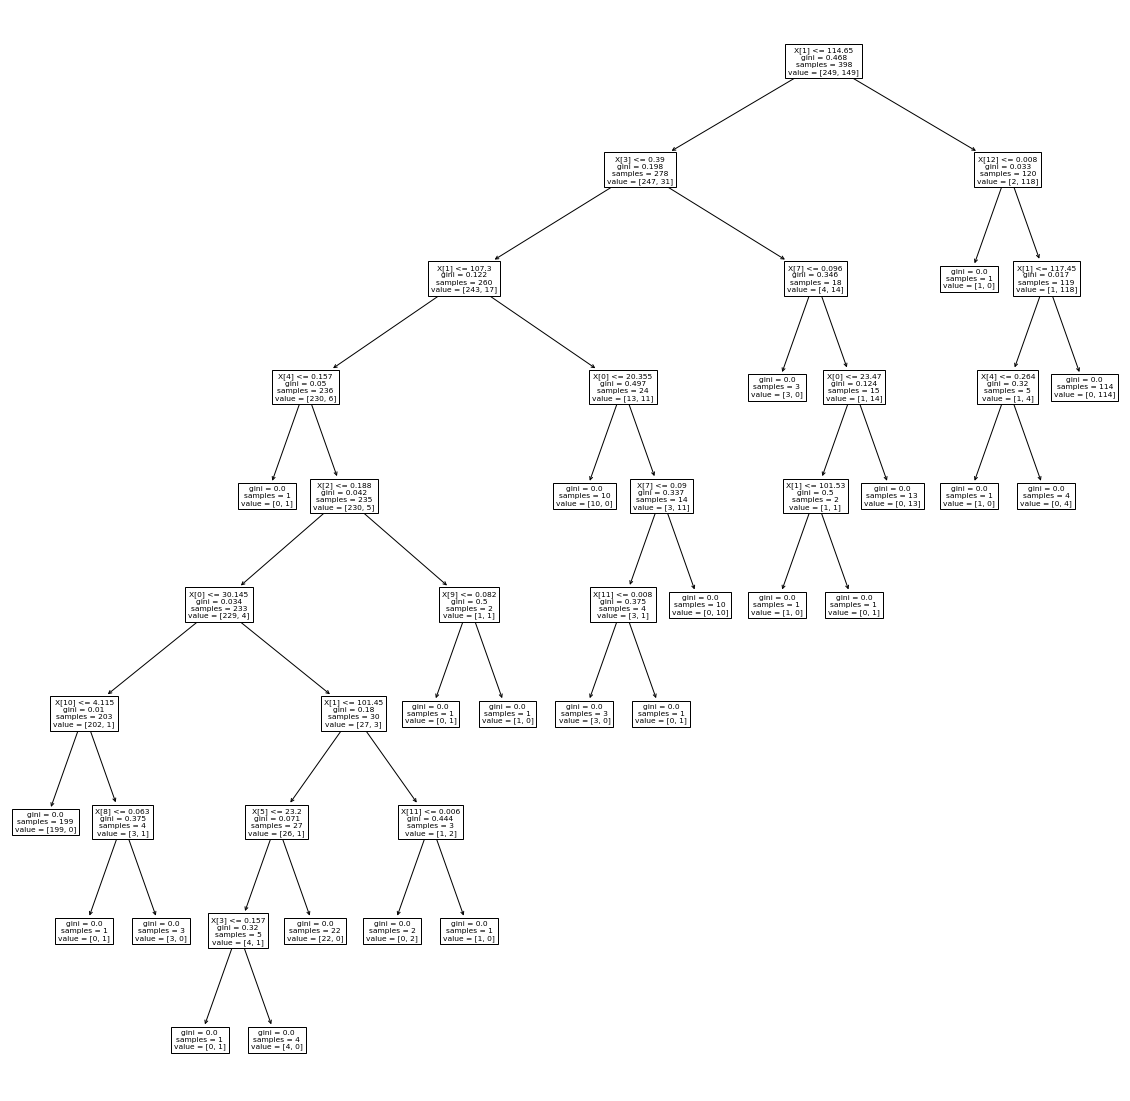

In [65]:
 # Plot Decision Tree for 14 features
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(tree_clf)
plt.show()

In [66]:
# Random Forest for 14 features
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.9473684210526315

Classification Report: 
 	Precision: 0.921875
	Recall Score: 0.9365079365079365
	F1 score: 0.9291338582677166

Confusion Matrix: 
 [[103   5]
 [  4  59]]



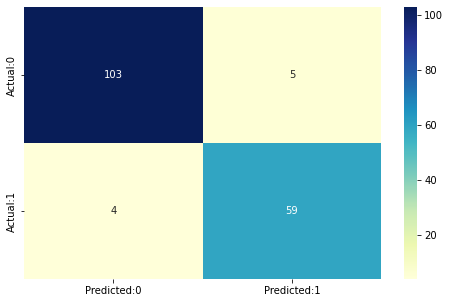

In [67]:
cm=confusion_matrix(y_test,rf_clf.predict(X_test))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [68]:
#True Negative, True Positive, False Negative, False Positive
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
#Accuracy
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round((TP+TN)/float(TP+TN+FP+FN),4))
#Sensitivity
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),4))
# Precision：positive prediction rate
print('Precision = TP/(TP+FP) = ', round(TP/float(TP+FP),4))

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9474
Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9365
Precision = TP/(TP+FP) =  0.9219


## KNN

In [44]:
#KNN
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [80]:
#Dividing data into features and labels
feature_columns = ['texture_worst', 'perimeter_worst', 'smoothness_worst',
       'compactness_worst', 'symmetry_worst', 'texture_mean', 'perimeter_mean',
       'smoothness_mean', 'compactness_mean', 'fractal_dimension_mean',
       'perimeter_se', 'smoothness_se', 'compactness_se',
       'fractal_dimension_se']
X = df_select.values
y = df['diagnosis'].values

In [81]:
#Transforming Y variable

le = LabelEncoder()
y = le.fit_transform(y)

In [82]:
#Splitting data set into training and testing (80% Training)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [83]:
# creating a list of K for KNN
#The model will consider K values from 1 till 30 with an interval of 2 (All odd numbers from 1 till 30)
k_list = list(range(1,30,2))

# Creating list of Average Accuracy for each Cross-validation
cv_scores = []

# Performing 7-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=7, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

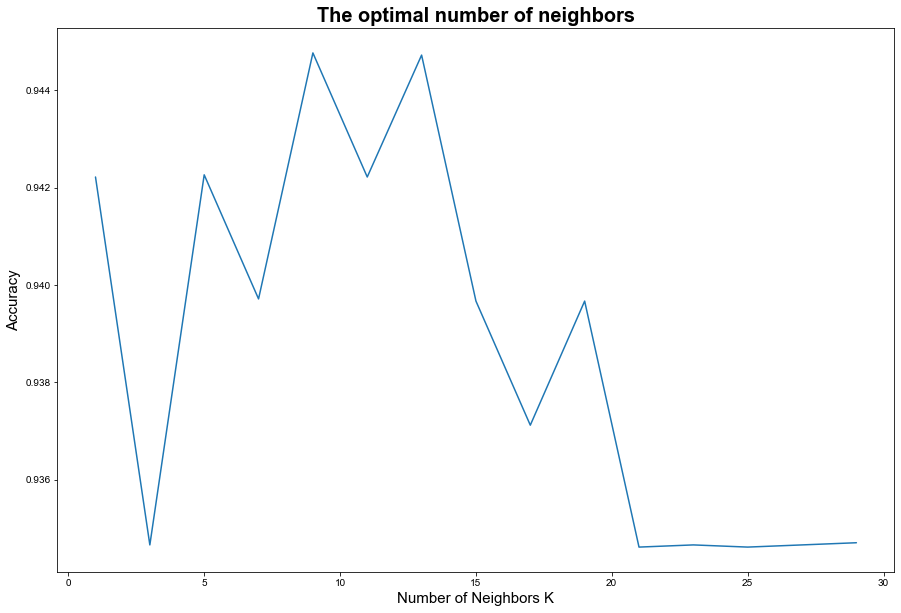

In [84]:
# Plotting average Accuracy for all number of neighbors

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
sns.set_style("whitegrid")

plt.plot(k_list, cv_scores)
plt.show()

### The optimal value of K is 9, since the accuracy obtained is the highest.

In [85]:
#Building a basic KNN model with K = 9

# First learning model (k = 9)
classifier = KNeighborsClassifier(n_neighbors=9)

# Fitting the model
clf_knn=classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [86]:
#Accuracy of our model

accuracy = accuracy_score(y_test, y_pred)*100

print('Accuracy of our model is equal to ' + str(round(accuracy, 2)) + '%')

Accuracy of our model is equal to 96.49%


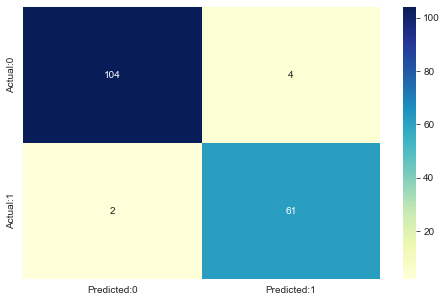

In [87]:
#cm vizualization
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [88]:
#True Negative, True Positive, False Negative, False Positive
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

In [89]:
#Accuracy
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round((TP+TN)/float(TP+TN+FP+FN),4))
#Sensitivity
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),4))
# Precision：positive prediction rate
print('Precision = TP/(TP+FP) = ', round(TP/float(TP+FP),4))

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9649
Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9683
Precision = TP/(TP+FP) =  0.9385


## SVM

In [43]:
#SVM
from sklearn import svm
#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
X=df_select
y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#Loading the SVM model
clf = svm.SVC(probability=True)
#Fitting the SVM model on our training data
clf_svm=clf.fit(X_train, y_train)
#Making predictions on our testing data
y_pred = clf.predict(X_test)
#Evaluating our model
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[106   2]
 [  4  59]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



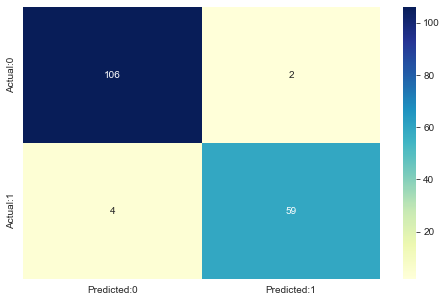

In [91]:
#cm vizualization
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [92]:
#True Negative, True Positive, False Negative, False Positive
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]

In [93]:
#Accuracy
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round((TP+TN)/float(TP+TN+FP+FN),4))
#Sensitivity
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),4))
# Precision：positive prediction rate
print('Precision = TP/(TP+FP) = ', round(TP/float(TP+FP),4))

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9649
Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9365
Precision = TP/(TP+FP) =  0.9672


### Logistic Regression for 14 features

In [94]:
X=df_select
y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.9590643274853801

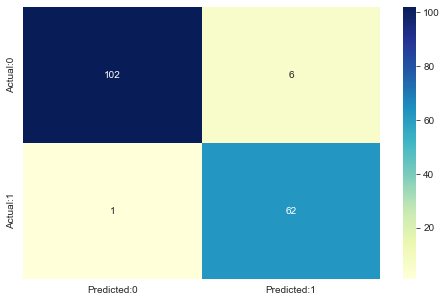

In [95]:
#cm vizualization
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [96]:
#True Negative, True Positive, False Negative, False Positive
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
#Accuracy
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round((TP+TN)/float(TP+TN+FP+FN),4))
#Sensitivity
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),4))
# Precision：positive prediction rate
print('Precision = TP/(TP+FP) = ', round(TP/float(TP+FP),4))

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9591
Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9841
Precision = TP/(TP+FP) =  0.9118


## Adaboost
### Description
#### The most common way to use Adaboost is by applying Decision Trees and Random Forest. In Random Forest, we take in all the predictors we need to make a full-sized tree, and each tree has an equal vote on the final classification. But in contrast, Adaboost only takes in one predictor at a time to make forest of stumps, and they have unequal votes during the final classification. Overall, Adaboost is an iterative ensemble method. It builds a strong classifier by combining multiple poorly performing classifiers in order to get high accuracy strong classifier. 
### Limitation
#### It is very sensitive to noisy data and outliers.
### Steps

#### 1. Initially, Adaboost selects a training subset randomly.
#### 2. It iteratively trains the AdaBoost machine learning model by selecting the training set based on the accurate prediction of the last training.
#### 3. It assigns the higher weight to wrong classified observations so that in the next iteration these observations will get the high probability for classification.
#### 4. Also, It assigns the weight to the trained classifier in each iteration according to the accuracy of the classifier. The more accurate classifier will get high weight.
#### 5. This process iterate until the complete training data fits without any error or until reached to the specified maximum number of estimators.
 #### 6. To classify, perform a "vote" across all of the learning algorithms you built.

In [69]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [70]:
X=df_select
y=df[['diagnosis']]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0) # 70% training and 30% test

In [71]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ab_clf = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = ab_clf.predict(X_test)

- base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.
- n_estimators: Number of weak learners to train iteratively.
- learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

In [72]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315


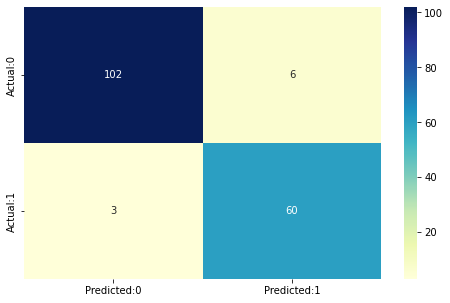

In [73]:
cm=confusion_matrix(y_test,ab_clf.predict(X_test))
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [74]:
#True Negative, True Positive, False Negative, False Positive
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
#Accuracy
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round((TP+TN)/float(TP+TN+FP+FN),4))
#Sensitivity
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),4))
# Precision：positive prediction rate
print('Precision = TP/(TP+FP) = ', round(TP/float(TP+FP),4))

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.9474
Sensitivity or True Positive Rate = TP/(TP+FN) =  0.9524
Precision = TP/(TP+FP) =  0.9091


## Gaussian Naive Bayes

### Description
#### Gaussian Naïve Bayes comes from the family of Naïve Bayes which also include Multinomial and Bernoulli Naïve Bayes models. These are all simple "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features. GNB classifier is based on continuous variables that are assumed to have a Gaussian (as known as the normal) distribution. 

### Limitation
#### GNB assumes all the predictors to be mutually independent. This might be the reason why the accuracy and sensitivity scores shown here are the lowest among all the models we used, because in real life, it’s almost impossible that we get a set of predictors that are totally independent with each other, like the texture and the perimeter of the tumor, they indeed have some correlations with each other.

### Steps
#### 1. Calculate the prior probability for given class labels.
#### 2. Find Likelihood probability with each attribute for each class.
#### 3. Put these value in Bayes Formula and calculate posterior probability.
#### 4. See which class has a higher probability, given the input belongs to the higher probability class.

In [75]:
X = df_select
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((398, 14), (171, 14))

In [76]:
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb_clf=gnb.fit(X_train, y_train)
#predict result
y_pred = gnb.predict(X_test)
#check accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8889


In [77]:
#check for overfiting and underfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9472
Test set score: 0.8889


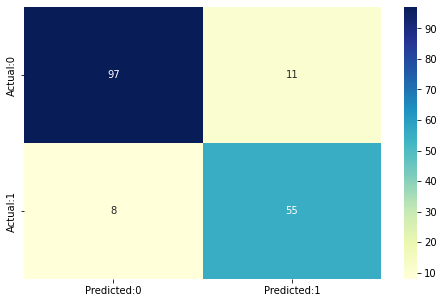

In [78]:
#cm vizualization
cm = confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")
plt.show()

In [79]:
#True Negative, True Positive, False Negative, False Positive
TN=cm[0,0]
TP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
#Accuracy
print('The acuracy of the model = TP+TN/(TP+TN+FP+FN) = ', round((TP+TN)/float(TP+TN+FP+FN),4))
#Sensitivity
print('Sensitivity or True Positive Rate = TP/(TP+FN) = ', round(TP/float(TP+FN),4))
# Precision：positive prediction rate
print('Precision = TP/(TP+FP) = ', round(TP/float(TP+FP),4))

The acuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8889
Sensitivity or True Positive Rate = TP/(TP+FN) =  0.873
Precision = TP/(TP+FP) =  0.8333


# Conclusions

### We want to find the best model for our classification, so we plot a Multi-models ROC curve of the 7 models.

In [97]:
def multi_models_roc(names,sampling_methods,colors,X_test,y_test,save=True,dpin=100):
    plt.figure(figsize=(12,12),dpi=dpin)
    
    for (name,method,colorname) in zip(names,sampling_methods,colors):
        y_test_preds=method.predict(X_test)
        y_test_predprob=method.predict_proba(X_test)[:,1]
        fpr,tpr,thresholds= roc_curve(y_test,y_test_predprob,pos_label=1)
        
        plt.plot(fpr,tpr,lw=5,label='{}(AUC={:.3f})'.format(name,auc(fpr,tpr)),color=colorname)
        plt.plot([0, 1], [0, 1], '--', lw=5, color = 'grey')
        plt.axis('square')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.xlabel('False Positive Rate',fontsize=20)
        plt.ylabel('True Positive Rate',fontsize=20)
        plt.title('ROC Curve',fontsize=25)
        plt.legend(loc='lower right',fontsize=20)
    
    if save:
        plt.savefig('multi_models_roc.png')

    return plt

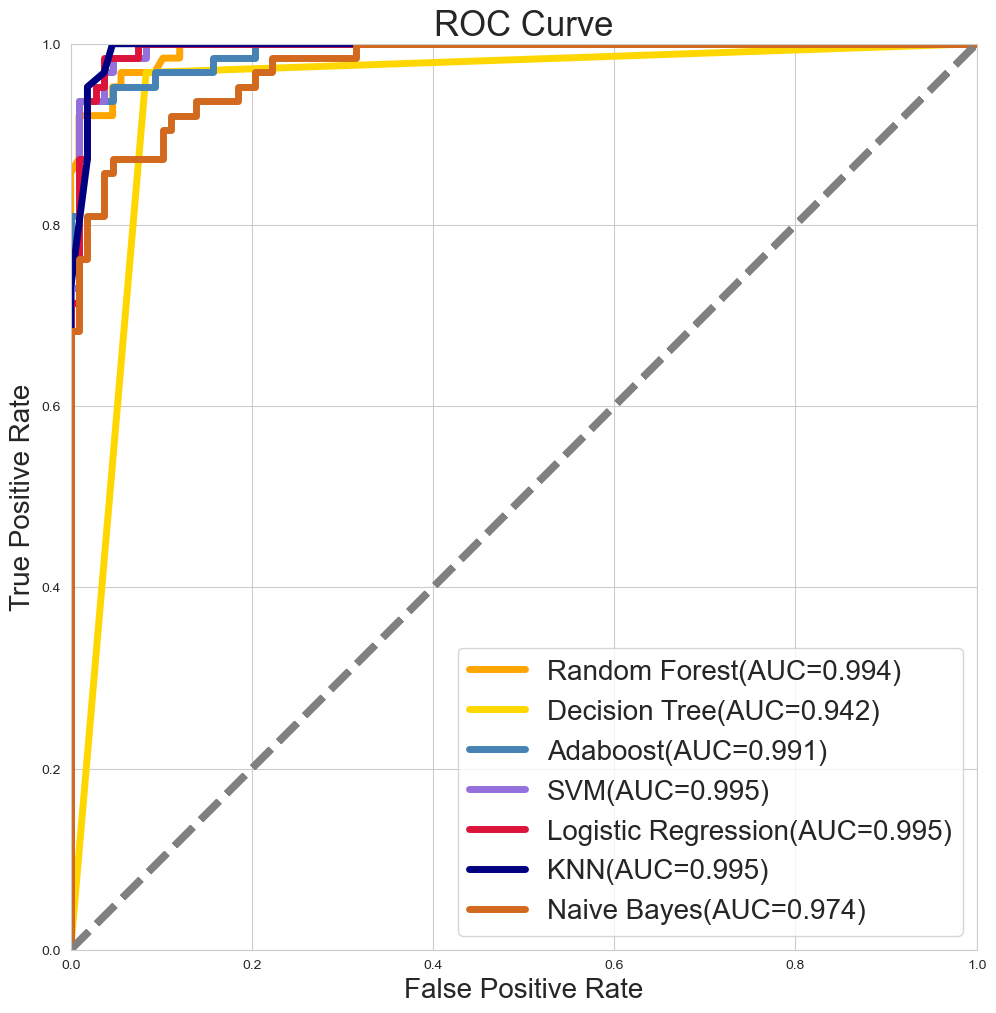

In [98]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score,auc
X=df_select
y=df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

names=['Random Forest','Decision Tree','Adaboost','SVM','Logistic Regression','KNN','Naive Bayes']
#names=['Random Forest','Decision Tree','KNN','SVM']
sampling_methods=[rf_clf,tree_clf,ab_clf,clf_svm,logreg,clf_knn,gnb_clf]
#sampling_methods=[rf_clf,tree_clf,clf_knn,clf_svm]
colors=['orange','gold','steelblue','mediumpurple','crimson','navy','#D2691E']
roc_graph=multi_models_roc(names,sampling_methods,colors,X_test,y_test,save=True,dpin=100)
roc_graph.savefig('Roc_Train_all.png')

### According to the ROC curve, it is hard to decide which one is the best, since SVM, Logistic Regression and KNN have the same top AUC values. When closely looking at the curve, Logistic Regression and KNN model are overlapping with each other, which is hard to tell which one is indeed better.

### However, after reading some research paper based on the medical disease classification, we found that there is a F1 score that is better than the accuracy score, because our classification on the breast tumor is more focusing on detecting the malignant stage.

### F1 Score
#### The F1 score (F Measure) is a measure of a model’s performance when a single value is wanted. It considers both the Precision and the Sensitivity scores into computation, as the function shows below.
- Sensitivity: Proportion of actual malignant cases that have gotten predicted as positive by our model, measures how well we predict the true malignant.
- Precision:  Represents the degree of miscalculation, higher the precision, lower the miscalculation.
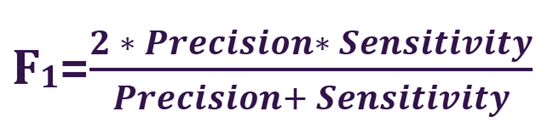

### The column of F1 scores is shown in the table below. The higher the F1 score, the better the model fits.
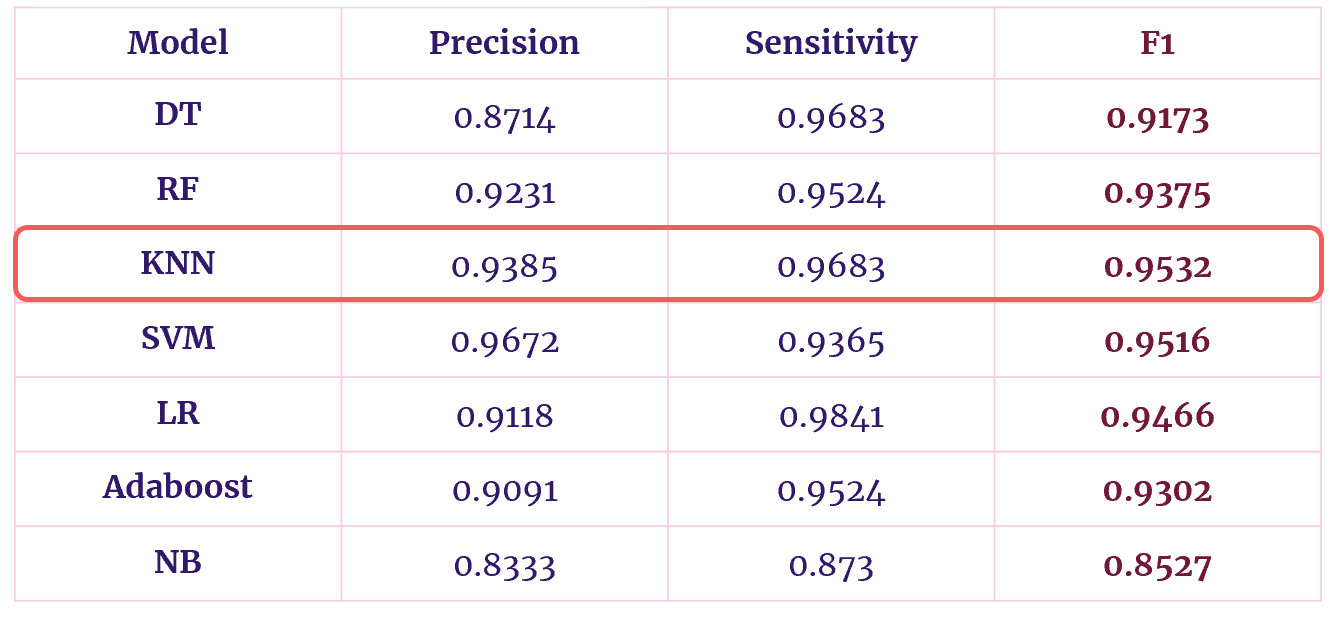
### Thus, KNN should be the best model for our classification.

## Select K Best & Chi-Squared Test
### Next, we want to find out the most important features for the prediction, so we applied select K best and Chi-squared test. The higer the score, the more importance or more useful the feature is for the classification.

In [117]:
 # K features that mostly impact y
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X=df_select
y=df[['diagnosis']]

In [118]:
# Select all feature to see the rankings of importance of them
bestfeatures = SelectKBest(score_func=chi2,k=len(X.columns))
fit = bestfeatures.fit(X, y)

In [101]:
# return the features with importance score
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
df_feature_score=pd.concat([df_columns,df_scores],axis=1)
df_feature_score.columns=['feature_name','score']
df_feature_score.sort_values(by="score",ascending=False)

,feature_name,score
1,perimeter_worst,3665.035416
6,perimeter_mean,2011.102864
10,perimeter_se,250.571896
0,texture_worst,174.449400
5,texture_mean,93.897508
3,compactness_worst,19.314922
8,compactness_mean,5.403075
4,symmetry_worst,1.298861
12,compactness_se,0.613785
2,smoothness_worst,0.397366


#### According to the score, the two most important features for this classificaion are perimeter and texture.

### To get more deeper, we calculate the coefficient and P-value of the 2 features, and make a plot of them.

In [102]:
# Average of Perimeter and Texture
df_pt=pd.DataFrame()
df_pt['Perimeter']= (df_select['perimeter_worst']+df_select['perimeter_mean']+df_select['perimeter_se'])/3
df_pt['Texture']=(df_select['texture_worst']+df_select['texture_mean'])/2
df_pt['Diagnosis']=df['diagnosis']
df_pt

,Perimeter,Texture,Diagnosis
0,105.329667,13.855,1
1,98.366000,20.590,1
2,95.695000,23.390,1
3,59.965000,23.440,1
4,97.579333,15.505,1
...,...,...,...
564,105.257667,24.395,1
565,97.134333,33.250,1
566,79.475000,31.100,1
567,110.157333,34.375,1


In [103]:
X=df_pt[['Perimeter','Texture']]
y=df_pt['Diagnosis']
# To see the p-values of each variables:
import statsmodels.api as sm 
# fit the model with maximum likelihood function
model = sm.Logit(endog=y, exog=X).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.597880
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      567
Method:                           MLE   Df Model:                            1
Date:                Fri, 16 Dec 2022   Pseudo R-squ.:                 0.09456
Time:                        17:10:49   Log-Likelihood:                -340.19
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                 3.478e-17
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Perimeter      0.0483      0.006      8.467      0.000       0.037       0.059
Texture       -0.1569      0.

### According to the result:
- Perimeter and Texture both have p-value < 0.05, which means a significant relationship with diagnosis.
- Perimeter has a positive coefficient (relationship), and Texture has a negative coefficient (relationship) with the malignant breast tumor.

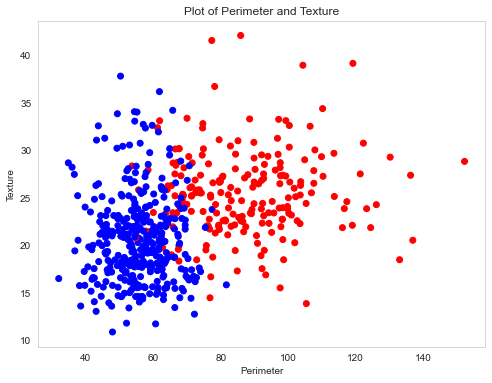

In [104]:
color_function = {0: "blue", 1: "red"} # Here Red color will be 1 which means M and blue foo 0 means B
colors = df_pt["Diagnosis"].map(lambda x: color_function.get(x))# mapping the color fuction with diagnosis column
plt.figure(figsize = [8,6])
plt.scatter(df_pt['Perimeter'],df_pt['Texture'],color = colors)
plt.xlabel('Perimeter')
plt.ylabel('Texture')
plt.title('Plot of Perimeter and Texture')
plt.grid()
plt.show()

# III. Final Conclusion
## Best Model: KNN
## Most Important Features:
### 1. Perimeter：Represent the Size of Tumor.
### 2. Texture：
- Represent Gray-Scale Level, calculated in a gray-scale image, which is shown below.
- When there is a tumor in the body, since the tumor has a high density inside, after applying X-ray on it, the tumor will absorb most of the X-ray and appears a white area on the gray-scale image, which makes the image area 'whiter' and will decrease the gray-scale level (texture). So, the bigger the  tumor, the lower the texture.
#### In another word, the texture is also representing the size of tumor.
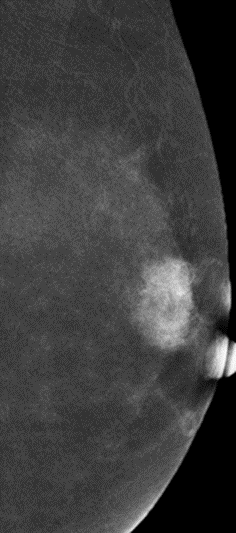

## In general, size  of the tumor is the most important feature for predicting the condition of cancer. The bigger the tumor, the more likely it is malignant.



# Future Work
1. Our data mostly comes from CT image, which only represents the size and shape of tumor. There are other factors that also important for identifying the condition of cancer.
- Age of patients：Benign tumors occur mostly in young people under 30 years old, malignant tumors occur mostly in women between 40 and 60 years old.
- Growth Rate of tumor: Malignant tumors grow much faster than benign tumors.
- Boundary: Benign tumors have clear boundaries, malignant tumors do not.
2. Stage of Cancer: We've seen people use fractal dimension data, which we also use in our data, to detect the stage of cancer, so we wondered if we could use our data to not only identify whether it's malignant or benign, but also the stage of cancer.